# Portfolio Sample Project: Python Data Science
## Andrea M. Mejia 
#### (858) 466-9040 
#### Email me at betterbiz.drea@gmail.com
This notebook demonstrates some of my skillsets in python. This project will focus on demonstrating data mining, web scraping, data analytics and basic machine learning packages. 

I will be analyzing twitter post that mention the San Diego Padres offical page. 

In [2]:
#Imports
import numpy as np
import pandas as pd 
#import that social networking service scraper
import snscrape.modules.twitter as sntwitter
import snscrape
# Import nltk package 
# NLTK provides support for a wide variety of text processing tasks: 
# tokenization, stemming, proper name identification, part of speech identification, etc. 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('vader_lexicon') # this will help us analyze tweet emotions
# scikit-learn imports
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# snsscrape will scrape twitter
import snscrape.modules.twitter as sntwitter
import snscrape as sn
import snscrape.modules.twitter as sntwitter
# import re for regular expression
import re

# seaborn for plotting
import seaborn as sns
sns.set(font_scale=1.2, style="white")
from datetime import datetime, timedelta

# import matplotlib for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 6)

# improve resolution
%config InlineBackend.figure_format ='retina'

from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import string
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/drea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# download stopwords & punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/drea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/drea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Getting the Data

In [4]:

    

query = str
def twitter_search(query):
    """ This function provides a convient way to retrieve twitter data and put it in a dataframe"""

    query = query
    tweets = []
    limit = 10000


    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        
        if len(tweets) == limit: 
            break
        else:
            tweets.append([tweet.date,tweet.user.username,tweet.content,])
        
    df = pd.DataFrame(tweets, columns = ['Date','User','content'])
    return df

In [5]:
test_df = twitter_search(' (@padres) until:2023-12-31 since:2023-01-01 -filter:replies')
test_df_copy = test_df.copy() #copy of test_df for sentiment analysis
test_df.head()




,Date,User,content
0,2023-01-25 00:07:37+00:00,begleyshane,If the @Padres knew about @MikeClevinger and d...
1,2023-01-25 00:00:31+00:00,KaplanandCrew,Now that Arte Moreno is not going to sell the ...
2,2023-01-24 23:58:54+00:00,MrDimplesSD,Preller needs to stop playing and announce the...
3,2023-01-24 22:30:28+00:00,Padres,"5 years ago, @THoffman51 got the HOF call... h..."
4,2023-01-24 22:18:59+00:00,ColeThomas0,a zillion/10 @Padres


In [6]:
#let's download it so we don't have to run the cell everytime. 
test_df_copy.to_csv('Test_Content_dataset', index=False)

In [7]:
test_df.shape

(897, 3)

# Cleaning up the Data

In [8]:
# drop N/A values
test_df.dropna(how= 'any')
# dropping duplicates 
test_df.drop_duplicates(subset=['content'], inplace= True)
print (len(test_df))

# this dropped 10 entries


887


In [9]:
# let's drop duplicate users 
test_df.drop_duplicates(subset= 'User', inplace = True)
test_df.shape
# 


(603, 3)

We can see from the two cells above that the entries changed from 885 to 602 after dropping duplicate users.

# Get Ready for a sentimental analysis 
### Tokenize and removing stopwords

In [10]:
test_df['content'] = test_df['content'].apply(word_tokenize)
test_df.head()

,Date,User,content
0,2023-01-25 00:07:37+00:00,begleyshane,"[If, the, @, Padres, knew, about, @, MikeClevi..."
1,2023-01-25 00:00:31+00:00,KaplanandCrew,"[Now, that, Arte, Moreno, is, not, going, to, ..."
2,2023-01-24 23:58:54+00:00,MrDimplesSD,"[Preller, needs, to, stop, playing, and, annou..."
3,2023-01-24 22:30:28+00:00,Padres,"[5, years, ago, ,, @, THoffman51, got, the, HO..."
4,2023-01-24 22:18:59+00:00,ColeThomas0,"[a, zillion/10, @, Padres]"


In [11]:
#stemming
ps = PorterStemmer()
def stem_words(sentence):
    stemmed = []
    for word in sentence:
        stemmed.append(ps.stem(word))
    return stemmed

test_df['content'] = test_df['content'].apply(stem_words)
test_df.head()

,Date,User,content
0,2023-01-25 00:07:37+00:00,begleyshane,"[if, the, @, padr, knew, about, @, mikecleving..."
1,2023-01-25 00:00:31+00:00,KaplanandCrew,"[now, that, art, moreno, is, not, go, to, sell..."
2,2023-01-24 23:58:54+00:00,MrDimplesSD,"[preller, need, to, stop, play, and, announc, ..."
3,2023-01-24 22:30:28+00:00,Padres,"[5, year, ago, ,, @, thoffman51, got, the, hof..."
4,2023-01-24 22:18:59+00:00,ColeThomas0,"[a, zillion/10, @, padr]"


In [12]:
word_stack = test_df['content'].apply(pd.Series).stack()
word_stack

0    0       if
     1      the
     2        @
     3     padr
     4     knew
           ... 
896  10      es
     11      de
     12      lo
     13       @
     14    padr
Length: 16718, dtype: object

In [13]:
from nltk.probability import FreqDist 
import string

# Word frequency in tweets
fdist_words = FreqDist(word_stack) 

# remove punctuation counts
for punc in string.punctuation: 
    del fdist_words[punc]
fdist_words

FreqDist({'padr': 679, 'the': 459, 'http': 298, 'to': 232, 'a': 219, 'and': 174, 'i': 162, 'for': 149, 'of': 147, 'in': 144, ...})

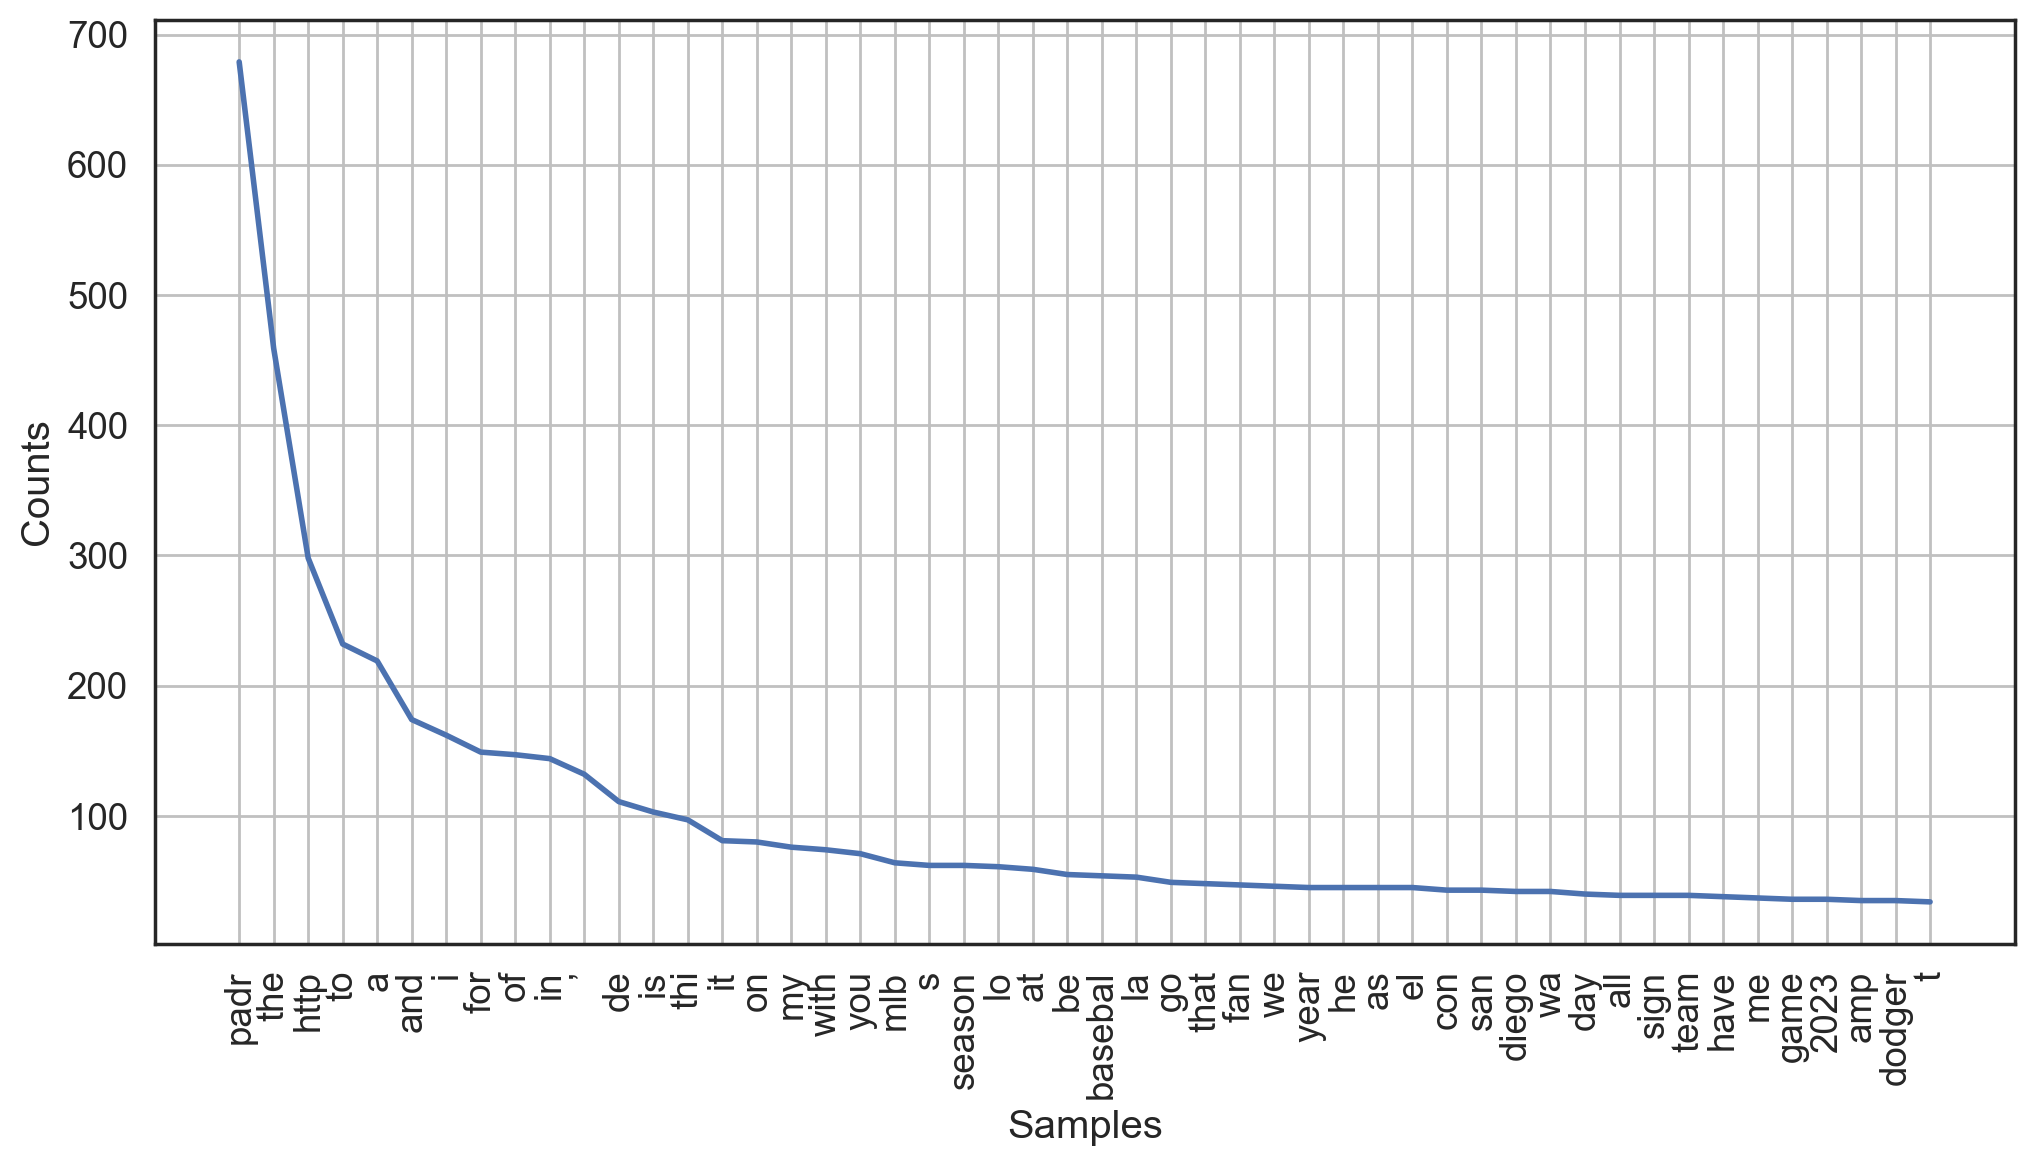

In [14]:
word_frequency_graph = fdist_words.plot(50, cumulative=False);

# Sentiment Analysis
pos + neg + neu = 1
compound score - metric that calculates sum of all the lexicon ratings and normalizes between -1 (most extreme negative) and +1 (most extreme positive)
- positive: compound >= 0.05 
- neutral: -0.05 < compound < 0.05 
- negative : compound <= -0.05

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [35]:
padres_list = list(test_df_copy['content'].values)


In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()
def get_sentiments(input_list):
    out = pd.DataFrame()
    
    for sentence in input_list:
        scores = analyzer.polarity_scores(sentence)
        scores['sentence'] = sentence
        out = out.append(scores, ignore_index=True)
    
    return out

In [25]:
p2 = get_sentiments(padres_list)
p2.describe()

,neg,neu,pos,compound
count,897.000000,897.000000,897.000000,897.000000
mean,0.036960,0.852959,0.110075,0.210720
std,0.089315,0.154372,0.137908,0.401083
min,0.000000,0.159000,0.000000,-0.950000
25%,0.000000,0.749000,0.000000,0.000000
50%,0.000000,0.882000,0.061000,0.000000
75%,0.000000,1.000000,0.189000,0.557400
max,0.643000,1.000000,0.841000,0.982800


<AxesSubplot: ylabel='Density'>

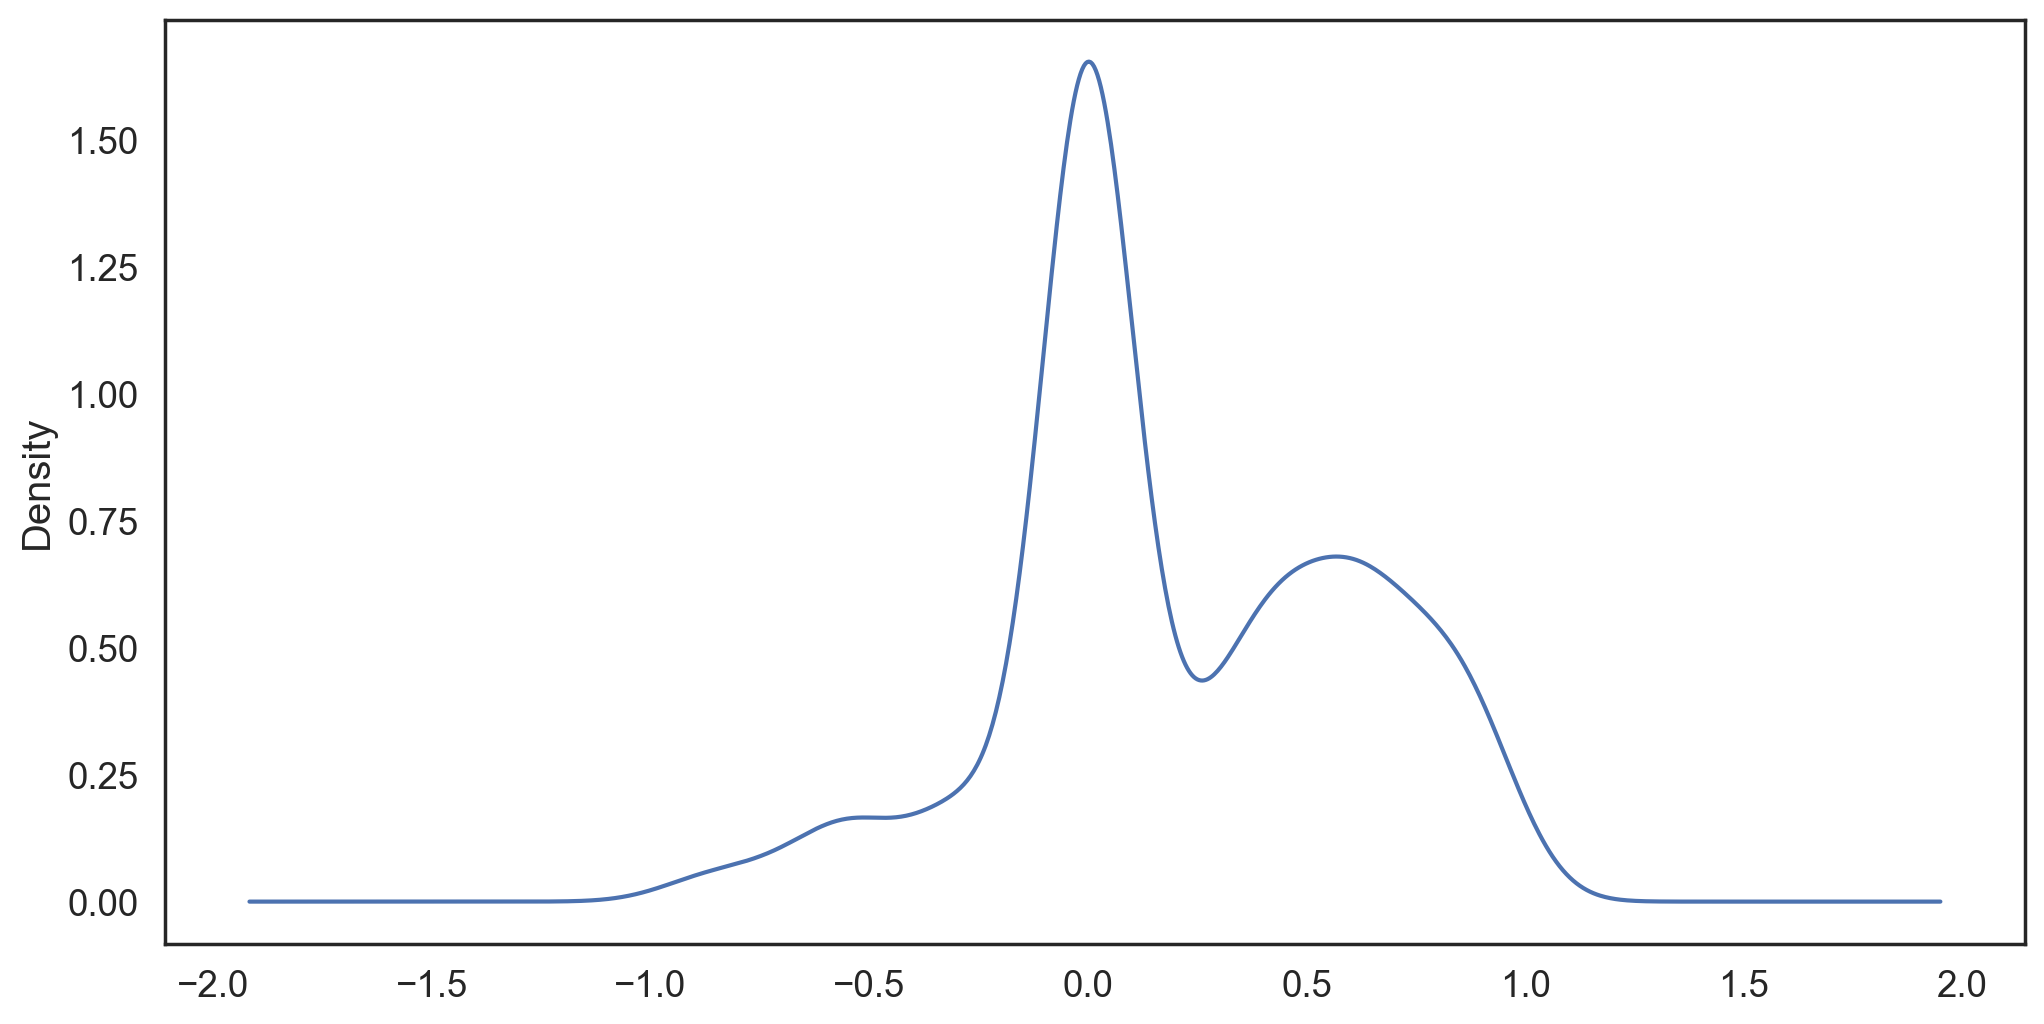

In [26]:
p2['compound'].plot.density(label = 'content sentiment')

In [33]:
avg_sent = p2['compound'].mean()
print ( " The average sentimental value is", avg_sent, ". This leads us to conclude the positive sentiment in the twitter data")

 The average sentimental value is 0.21072006688963213 . This leads us to conclude the positive sentiment in the twitter data


This project was meant to show abilities on a set of data. This is only a sample of my skill set. I hope to hear from you soon. 

Thank you, 
 
Andrea Mejia   

 Contact: (858) 466 9040 ; betterbiz.drea@gmail.com